## K-means, measures of performance

In this notebook we will switch from using our own code to the KMeans implementation in SKLearn

1. The algorithm (animation)
2. The Basic theory


2. The algorithm (properties) (switching to sklearn)
3. Different ways of measuring the quality of clustering:
   * Correct number of clusters
   * closeness of cluster centers to truth.
   * Consistent labeling.
4. Varying number of centers.
5. Varying the dimension

In [4]:
from sklearn.cluster import KMeans
%pylab inline
import numpy as np
import pandas as pd

from lib.Kmeans_generate_and_analyze import *

Populating the interactive namespace from numpy and matplotlib


## There are three main ways to evaluate the quality of a k-means result
1. Number of labeling errors.
2. Errors in the locations of the centroids.
3. RMSE

### number of labling errors
* Consider a particular data point $\vec{x}$
* We can think of the index $i$ of the closest centroid $\vec{c}_i$ as the preducted label of $\vec{x}$
* In the good case, there is a 1-1 mapping between the true labels and the predicted labels such that most points match.
* **Unrealistic:** Requires knowing the locations of the *True* centers.

### Distance between true centers and Centroids
* We can match each centrer with the closest true centroid.
* In the good case, the distances between each center and it's matched centroid is small (much smaller than the distance between the centers.
* **Unrealistic:** Requires knowing the number and locations of the *True* centers.

### Elbow in the RMSE curve
* The RMSE is the average square distance between a data point and the closest centroid.
* Does not require additional knowledge.
* **The Elbow** if there is a value of $k$ such that the RMSE decreases rapidly below that $k$ and decreases slowly above this $k$, then we can conclude that this value of $k$ is correct, i.e. is equal to the number of true centers.

<img alt="" src="Figs/Elbow.png" style="width:500px" />

mapping of means to true clusters= [1 3 0 2]
classification accuracy=	 [1.   1.   0.99 1.  ]
error in ocation of centers=	 0.105,0.048,0.206,0.151


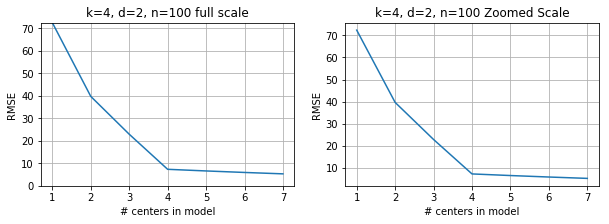

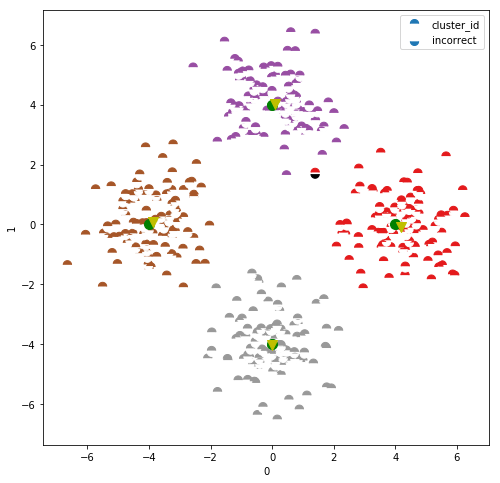

In [5]:
X=analyze(k=4,d=2,n=100,radius=4)

mapping of means to true clusters= [2 0 1 3]
classification accuracy=	 [0.96 0.96 1.   0.97]
error in ocation of centers=	 0.185,0.154,0.396,0.036


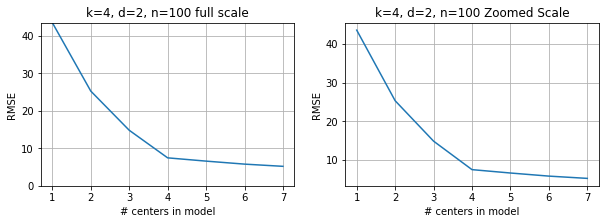

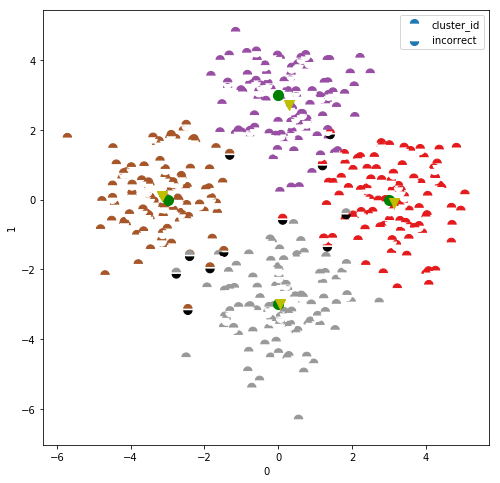

In [6]:
X=analyze(k=4,d=2,n=100,radius=3)

mapping of means to true clusters= [0 2 3 1]
classification accuracy=	 [0.87 0.81 0.82 0.87]
error in ocation of centers=	 0.322,0.106,0.212,0.256


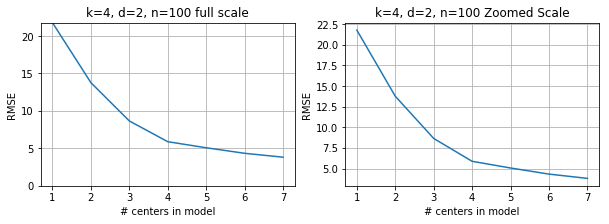

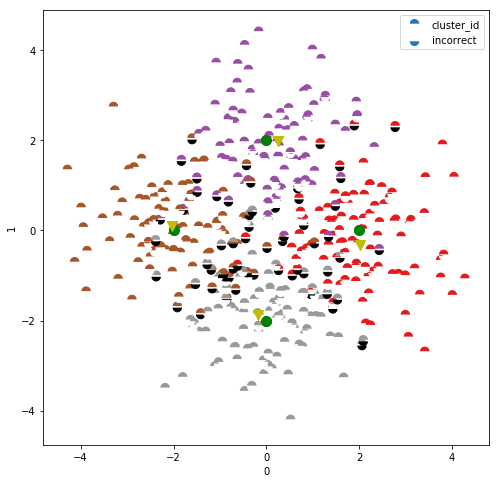

In [7]:
X=analyze(k=4,d=2,n=100,radius=2)

mapping of means to true clusters= [2 1 0 3]
classification accuracy=	 [0.97 0.98 0.97 0.94]
error in ocation of centers=	 0.043,0.288,0.049,0.077


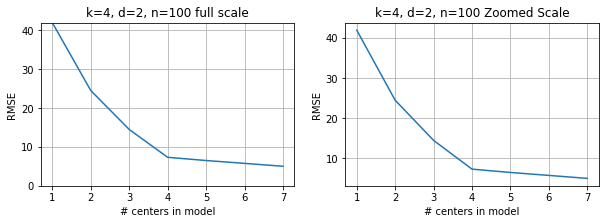

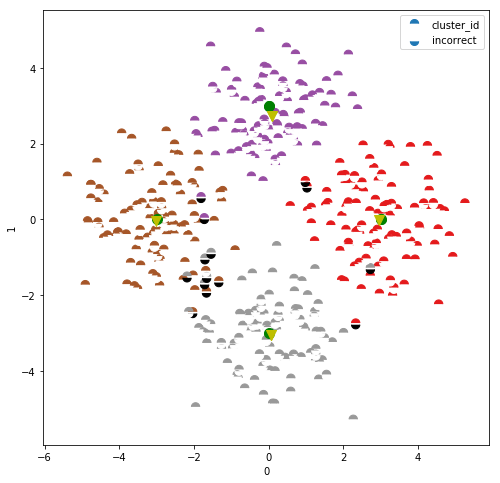

In [11]:
X=analyze(k=4,d=2,n=100,radius=3)

mapping of means to true clusters= [3 1 2 0]
classification accuracy=	 [1.  0.8 1.  1. ]
error in ocation of centers=	 0.668,1.444,0.285,1.393


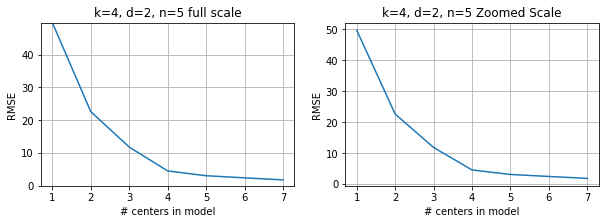

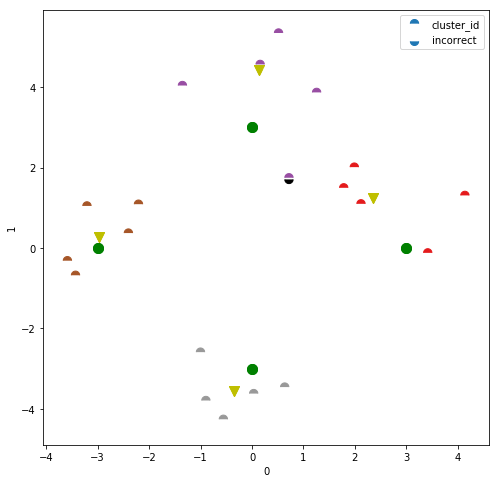

In [12]:
X=analyze(k=4,d=2,n=5,radius=3)

mapping of means to true clusters= [2 3 0 1]
classification accuracy=	 [0.99 0.98 0.99 1.  ]
error in ocation of centers=	 0.049,0.167,0.117,0.026


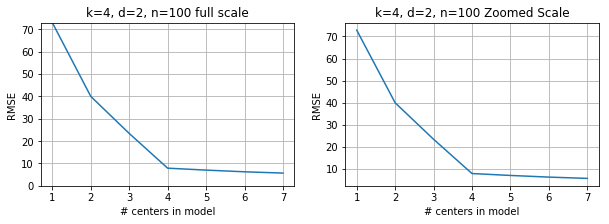

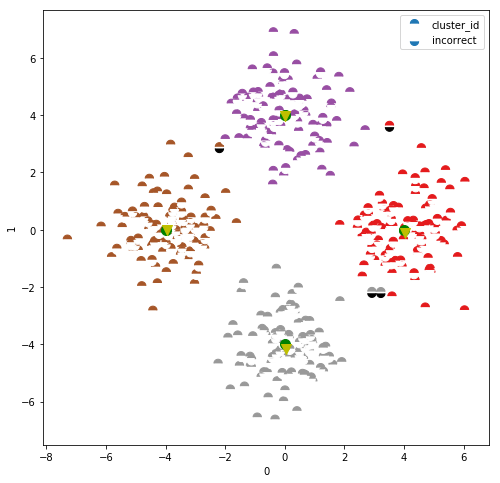

In [13]:
X=analyze(k=4,d=2,n=100,radius=4)

mapping of means to true clusters= [5 2 4 0 1 3]
classification accuracy=	 [0.97 0.98 0.94 0.89 0.98 0.93]
error in ocation of centers=	 0.161,0.086,0.195,0.336,0.046,0.230


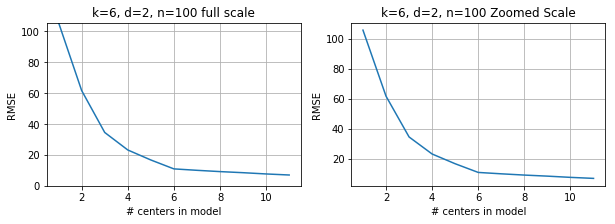

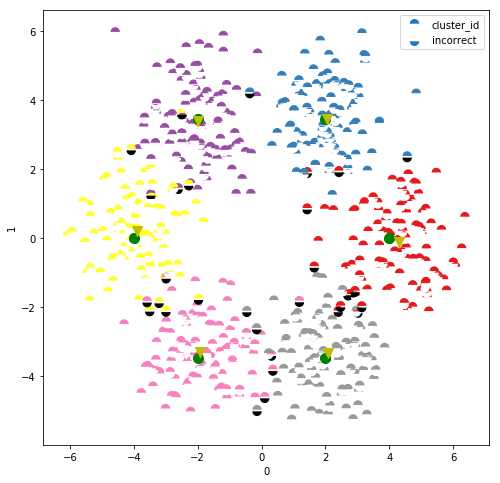

In [15]:
X=analyze(k=6,d=2,n=100,radius=4)

mapping of means to true clusters= [0 4 6 1 7 2 3 5]
classification accuracy=	 [0.93 0.84 0.9  0.93 0.86 0.85 0.84 0.86]
error in ocation of centers=	 0.121,0.111,0.202,0.068,0.224,0.357,0.166,0.225


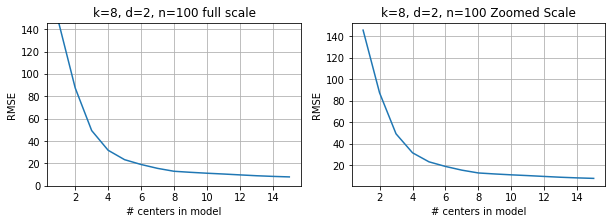

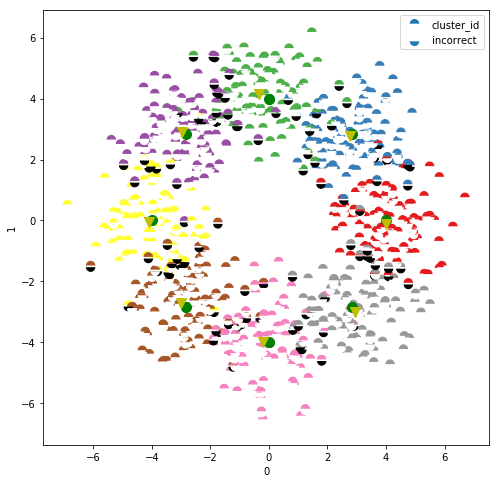

In [14]:
X=analyze(k=8,d=2,n=100,radius=4)

mapping of means to true clusters= [ 6 13  1  4  9 14  9 14  6  2 12  5  0  2  8 11]
classification accuracy=	 [0.26 0.47 0.53 0.64 0.4  0.39 0.4  0.41 0.42 0.54 0.36 0.7  0.56 0.29
 0.71 0.44]
error in ocation of centers=	 1.360,1.016,0.672,0.588,1.177,1.032,1.122,0.870,1.021,0.588,0.939,0.532,0.738,1.408,0.324,0.747


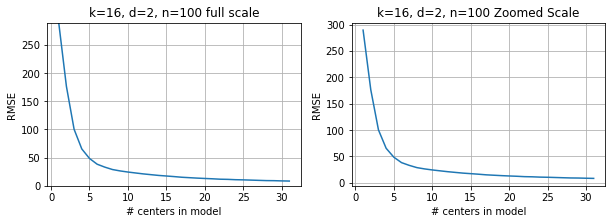

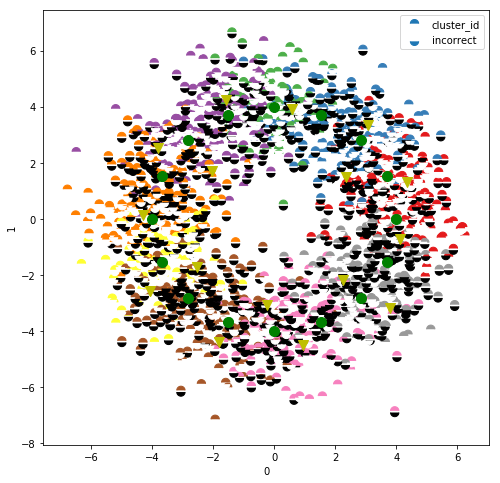

In [18]:
X=analyze(k=16,d=2,n=100,radius=4)

mapping of means to true clusters= [1 3 0 2]
classification accuracy=	 [0.77 0.87 0.89 0.83]
error in ocation of centers=	 0.401,0.215,0.199,0.206


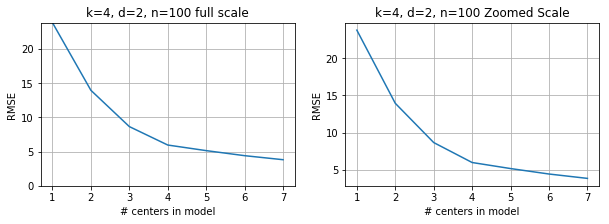

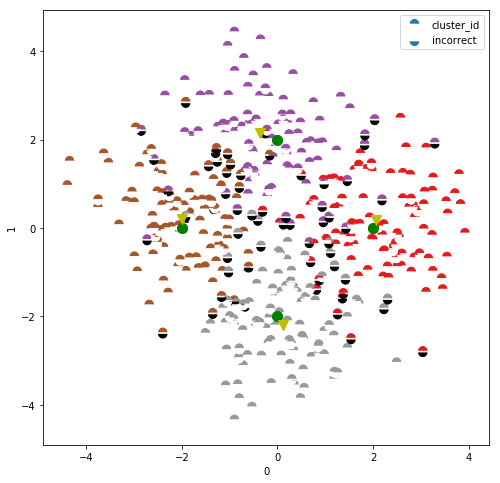

In [31]:
X=analyze(k=4,d=2,n=100,radius=2)

mapping of means to true clusters= [0 1 2 3]
classification accuracy=	 [0.79 0.75 0.85 0.79]
error in ocation of centers=	 0.692,0.802,0.613,0.593


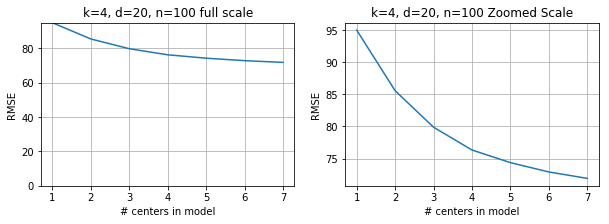

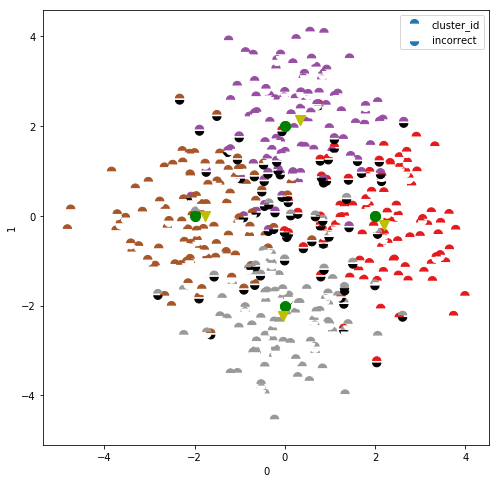

In [32]:
analyze(k=4,d=20,n=100,radius=2);

mapping of means to true clusters= [0 3 2 1]
classification accuracy=	 [0.8  0.86 0.7  0.44]
error in ocation of centers=	 1.223,1.208,1.639,1.980


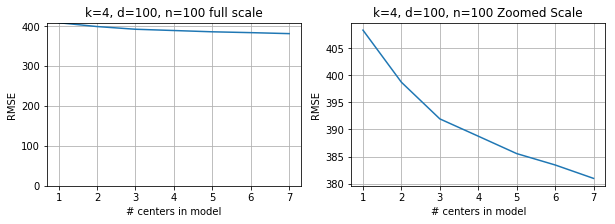

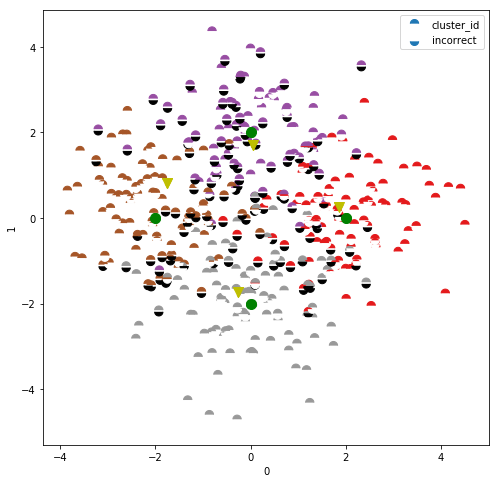

In [42]:
X=analyze(k=4,d=100,n=100,radius=2)

mapping of means to true clusters= [0 3 1 2]
classification accuracy=	 [0.69  0.48  0.585 0.455]
error in ocation of centers=	 1.549,2.128,1.576,2.046


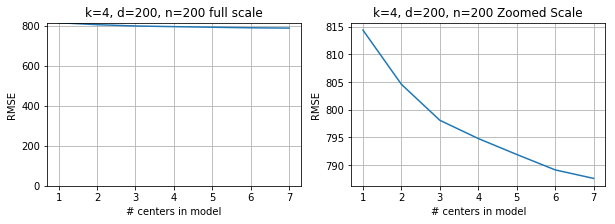

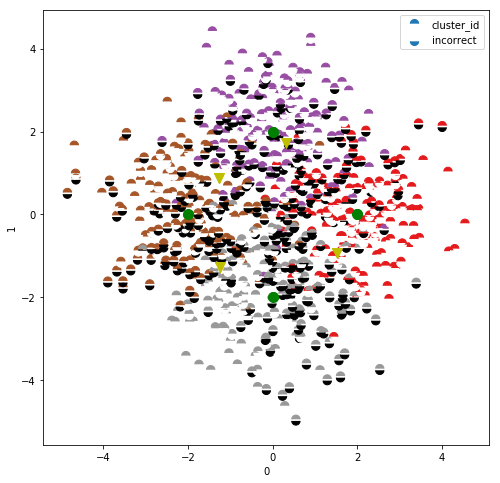

In [44]:
X=analyze(k=4,d=200,n=200,radius=2)